In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

WHITE = '#bbb3ff'
BLACK = 'black'
plt.rcParams['text.color'] = WHITE
plt.rcParams['axes.labelcolor'] = WHITE
plt.rcParams['xtick.color'] = WHITE
plt.rcParams['ytick.color'] = WHITE

# plt.rcParams['legend.color'] = WHITE

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [180]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [181]:
left = df[df['left'] == 1]
left.shape

(3571, 10)

In [182]:
retained = df[df['left'] == 0]
retained.shape

(11428, 10)

In [183]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


<AxesSubplot:xlabel='salary'>

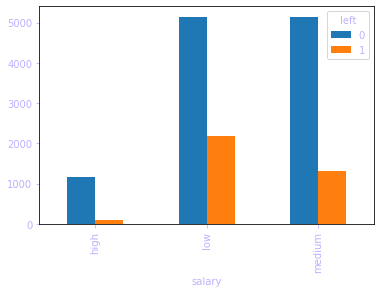

In [184]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

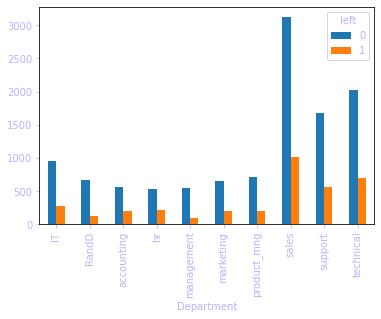

In [185]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [186]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [187]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [188]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_dummies.head()
df_dummies.drop('salary', axis='columns', inplace=True)
df_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [190]:
X = df_dummies
y = df.left

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4)
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
4161,0.90,260,0,1,0,0
9212,0.15,209,0,0,0,1
9469,0.16,163,0,0,0,1
14787,0.48,198,0,0,0,1
3382,0.83,211,0,0,0,1
...,...,...,...,...,...,...
2670,0.75,274,0,0,1,0
12002,0.11,272,0,0,0,1
6266,0.72,200,0,0,1,0
5457,0.96,231,0,0,1,0


In [191]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

C:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [192]:
model.score(X_test, y_test)

0.7715555555555556